In [3]:
import cv2
import numpy as np
import math
import imutils
from matplotlib import pyplot as plt
from ponyslayer.utils import imshow, imshows, imdraw, imdraws, imdraws_color, immask, immasks, implot, imsave
from ponyslayer import unicorn, transform

## Parameter Setup

In [4]:
image_resolution = 800 # [pixel] Image ratio can be only 1:1
image_size = 400 # [mm.]
marker_size = 60 # [mm.]
marker_size_error = 0.15 # [ratio] Allowable card size error
min_path_length = 30 # [mm.]
max_path_length = 999 # [mm.]
min_path_width = 5 # [mm.]
max_path_width = marker_size + (marker_size*marker_size_error) # [mm.]
gradient_crop_ratio = 0.9 # Exclude both end (prevent too width range from noise)
min_height = 10
max_height = 20
min_intensity_range = 15 # ช่วงของ intensity ที่แคบที่สุดที่ยังถือว่าเป็น gradient

## Filter Setup

In [5]:
UnsharpMaskBeforeFindMarker = True
BlurKernelSize = (3, 3)

## Load Image

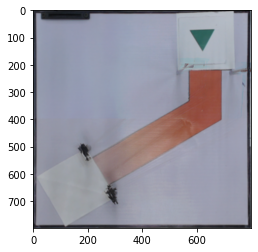

In [9]:
# frame = cv2.imread("Picture1.png")
# frame = cv2.imread("Picture3.jpg")
frame = cv2.imread("Real4.png")
frame = imutils.resize(frame, height=image_resolution, width = image_resolution)
original = frame.copy()

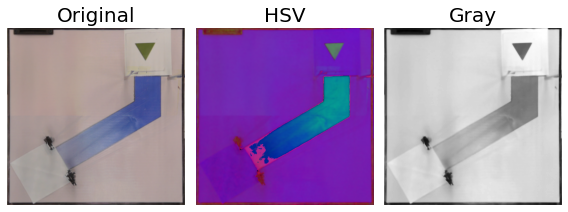

NameError: name 'img' is not defined

In [13]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, BlurKernelSize, 0)
HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
imshows([original, HSV, gray], ["Original", 'HSV', 'Gray'])
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame = cv2.medianBlur(frame,5)
frame = cv2.bilateralFilter(frame,9,75,75)

edges = cv2.Canny(frame,100,200)
imshow(edges)

## Filter
White = Low Saturation, Black = Low Value

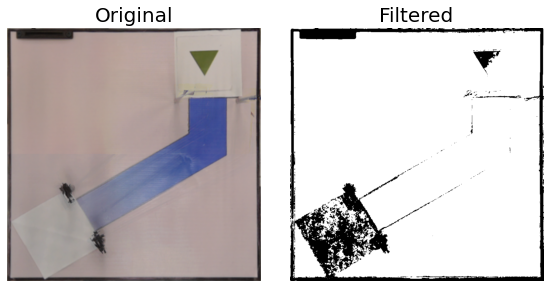

In [12]:
filter_lower = (0, 15, 100)
filter_max = (180, 255, 255)
filter_upper = (180, 255, 255)
filtered = cv2.inRange(HSV, filter_lower, filter_upper)
imshows([original, filtered], ["Original", "Filtered"])